In [ ]:
try:
    import google.colab
    USE_COLAB = True
except:
    USE_COLAB = False
if USE_COLAB:
    from google.colab import files
    uploaded = files.upload()
else:
    # CHANGE THIS TO YOUR LOCAL PATH
    #path =  "../../data/exercises/3D_data/"
    # path to github repo
    path = "https://raw.githubusercontent.com/stkroe/PythonForChemists/main/course/data/exercises/3D_data/"


Saving grid_data.dat to grid_data (1).dat


(30,)


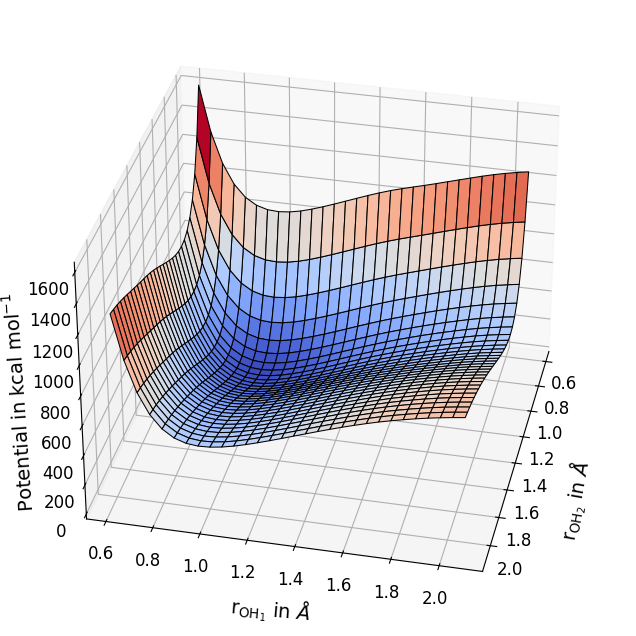

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import griddata

#def skip_blank_lines(s):
#    if s.strip() == '':
#        return None
#    return float(s)

#data = np.loadtxt('grid_data.dat', converters={0: skip_blank_lines})

# alternative:
data = pd.read_csv('grid_data.dat',header=None,
                   skipinitialspace=True,sep=' ')
# drop NA values of the blank lines
data = data.dropna()

# change panda DataFrame to numpy array
data = data.to_numpy()

x=data[:,0]
y=data[:,1]
z=data[:,2]

x_unique = np.unique(x)
y_unique = np.unique(y)

X, Y = np.meshgrid(x_unique, y_unique)


# griddata from the scipy.interpolate interpolates the
# scattered (unstructured) 1D data into a structured grid

Z = griddata((x, y), z, (X, Y), method='cubic')

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev = 32.5, azim = 12.5)


ax.xaxis.set_rotate_label(False)  # disable automatic rotation
ax.yaxis.set_rotate_label(False)  # disable automatic rotation
ax.zaxis.set_rotate_label(False)  # disable automatic rotation

ax.set_zlabel(r'$~~~~$Potential in kcal mol$^{{-1}}$', fontsize = 14, rotation = 94, labelpad = 6)

ax.set_xlabel('r$_\mathrm{{OH_2}}$ in $\AA$', fontsize = 14, labelpad = 15,  rotation = 80)
ax.set_ylabel('r$_\mathrm{{OH_1}}$ in $\AA$', fontsize = 14, labelpad = 10,  rotation = -5)

ax.tick_params(axis='both', labelsize=12)

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='coolwarm', linewidth = 0.75, edgecolor='k')